In [1]:
import os, cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras.optimizers
import random
import scipy
import math
import tensorflow as tf

In [2]:
CImagesDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\Stanford40_JPEGImages\CImages'
JPG_OrderDir =r'C:\Users\WillyB\Documents\GitHub\embedded_project\keras_Realtime_Multi-Person_Pose_Estimation-master/JPG_Order.txt'
partCoordsDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\keras_Realtime_Multi-Person_Pose_Estimation-master/partCoords.npy'

In [7]:
JPG_Order = [line.rstrip('\n') for line in open(JPG_OrderDir, 'r')]
partCoords = np.load(partCoordsDir)

In [5]:
JPG_Order[:10]

['applauding_001.jpg',
 'applauding_002.jpg',
 'applauding_003.jpg',
 'applauding_004.jpg',
 'applauding_005.jpg',
 'applauding_006.jpg',
 'applauding_007.jpg',
 'applauding_008.jpg',
 'applauding_009.jpg',
 'applauding_010.jpg']

In [3]:
def define_model(nrOfClasses):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(96, 96, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.20))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.20))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.20))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(nrOfClasses, activation='softmax'))
    # compile model¨
    #opt = keras.optimizers.Adam(learning_rate=0.001)
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

define_model(80)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 43, 43, 64)       

In [8]:
partCoords[:10]

array([[[125.,  50.],
        [101., 123.],
        [ 37., 135.],
        [ 23., 240.],
        [ 89., 165.],
        [164., 108.],
        [210., 209.],
        [153., 145.],
        [ 76., 281.],
        [ 67., 323.],
        [ nan,  nan],
        [161., 283.],
        [ nan,  nan],
        [ nan,  nan],
        [107.,  42.],
        [126.,  38.],
        [ 71.,  61.],
        [ nan,  nan]],

       [[109.,  46.],
        [106., 126.],
        [ 37., 129.],
        [ 17., 222.],
        [ 70., 191.],
        [172., 119.],
        [217., 225.],
        [181., 208.],
        [ nan,  nan],
        [ nan,  nan],
        [ nan,  nan],
        [ nan,  nan],
        [ nan,  nan],
        [ nan,  nan],
        [ 93.,  36.],
        [122.,  37.],
        [ 70.,  55.],
        [137.,  58.]],

       [[ 69.,  47.],
        [117.,  83.],
        [143.,  76.],
        [ nan,  nan],
        [ nan,  nan],
        [ 90.,  91.],
        [ 21., 127.],
        [ 24.,  77.],
        [ nan,  nan],
      

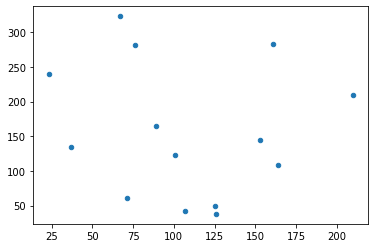

In [11]:
firstCoords = partCoords[0]
plt.scatter(firstCoords[:,0], firstCoords[:,1], s=20)

In [ ]:
cv2.readimage